# 셀프 주유소는 정말 저렴할까?
## 오피넷 검색

In [1]:
import time
from selenium import webdriver
from selenium.webdriver.common.keys import Keys

## 서울시 구별 주유소 가격 정보 얻기

In [2]:
driver = webdriver.Chrome()
driver.get('https://www.opinet.co.kr/user/main/mainView.do')

In [4]:
driver.find_element_by_css_selector('.ic_m1').click()

In [5]:
# 서울 자치구 리스트 가져오기
region = driver.find_element_by_xpath('//*[@id="SIGUNGU_NM0"]')
gu_list = region.find_elements_by_css_selector('option')
gu_names = [gu.text for gu in gu_list]
del gu_names[0]

In [6]:
gu = gu_names[0]
region = driver.find_element_by_css_selector('#SIGUNGU_NM0')
region.send_keys(gu)

In [7]:
# 엑셀 저장
driver.find_element_by_xpath('//*[@id="glopopd_excel"]').click()

In [8]:
# 25개 자치구에 대해서 엑셀 저장
for gu in gu_names:
    region = driver.find_element_by_css_selector('#SIGUNGU_NM0')
    region.send_keys(gu)
    time.sleep(1)

    driver.find_element_by_xpath('//*[@id="glopopd_excel"]').click()
    time.sleep(2)

In [19]:
driver.close()

# 구별 휘발유 가격에 대한 데이터 정리

In [9]:
import pandas as pd
from glob import glob

In [10]:
# 25개의 데이터가 리스트로 나옴->for문 가능
glob('C:/Users/CPB06GameN/Downloads/지역*.xls')

['C:/Users/CPB06GameN/Downloads\\지역_위치별(주유소) (1).xls',
 'C:/Users/CPB06GameN/Downloads\\지역_위치별(주유소) (10).xls',
 'C:/Users/CPB06GameN/Downloads\\지역_위치별(주유소) (11).xls',
 'C:/Users/CPB06GameN/Downloads\\지역_위치별(주유소) (12).xls',
 'C:/Users/CPB06GameN/Downloads\\지역_위치별(주유소) (13).xls',
 'C:/Users/CPB06GameN/Downloads\\지역_위치별(주유소) (14).xls',
 'C:/Users/CPB06GameN/Downloads\\지역_위치별(주유소) (15).xls',
 'C:/Users/CPB06GameN/Downloads\\지역_위치별(주유소) (16).xls',
 'C:/Users/CPB06GameN/Downloads\\지역_위치별(주유소) (17).xls',
 'C:/Users/CPB06GameN/Downloads\\지역_위치별(주유소) (18).xls',
 'C:/Users/CPB06GameN/Downloads\\지역_위치별(주유소) (19).xls',
 'C:/Users/CPB06GameN/Downloads\\지역_위치별(주유소) (2).xls',
 'C:/Users/CPB06GameN/Downloads\\지역_위치별(주유소) (20).xls',
 'C:/Users/CPB06GameN/Downloads\\지역_위치별(주유소) (21).xls',
 'C:/Users/CPB06GameN/Downloads\\지역_위치별(주유소) (22).xls',
 'C:/Users/CPB06GameN/Downloads\\지역_위치별(주유소) (23).xls',
 'C:/Users/CPB06GameN/Downloads\\지역_위치별(주유소) (24).xls',
 'C:/Users/CPB06GameN/Downloads\\지역_위치별(주유소) (25).

In [11]:
file = glob('C:/Users/CPB06GameN/Downloads/지역*.xls')[0]
df = pd.read_excel(file, header=2)
df.head()

,지역,상호,주소,상표,전화번호,셀프여부,고급휘발유,휘발유,경유,실내등유
0,서울특별시,재건에너지 재정제2주유소 고속셀프지점,서울특별시 강동구 천호대로 1246 (둔촌제2동),현대오일뱅크,02-487-2030,Y,-,1539,1339,-
1,서울특별시,구천면주유소,서울 강동구 구천면로 357 (암사동),현대오일뱅크,02-441-0536,N,-,1593,1397,-
2,서울특별시,지에스칼텍스㈜ 동서울주유소,서울 강동구 천호대로 1456 (상일동),GS칼텍스,02-426-5372,Y,-,1635,1435,-
3,서울특별시,현대오일뱅크㈜직영 명일셀프주유소,서울 강동구 고덕로 168 (명일동),현대오일뱅크,02-3428-1739,Y,1809,1635,1429,-
4,서울특별시,대성석유(주)직영 길동주유소,서울 강동구 천호대로 1168,GS칼텍스,02-474-7222,N,1798,1638,1438,1200


In [12]:
# 25개 파일을 읽어 하나의 데이터프레임으로 만듦
raw = []
for file in glob('C:/Users/CPB06GameN/Downloads/지역*.xls'):
    df = pd.read_excel(file, header=2)
    raw.append(df)

station_raw = pd.concat(raw)

In [13]:
station_raw.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1501 entries, 0 to 39
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   지역      1501 non-null   object
 1   상호      1501 non-null   object
 2   주소      1501 non-null   object
 3   상표      1501 non-null   object
 4   전화번호    1501 non-null   object
 5   셀프여부    1501 non-null   object
 6   고급휘발유   1501 non-null   object
 7   휘발유     1501 non-null   object
 8   경유      1501 non-null   object
 9   실내등유    1501 non-null   object
dtypes: object(10)
memory usage: 129.0+ KB


In [28]:
station_raw.tail()

,지역,상호,주소,상표,전화번호,셀프여부,고급휘발유,휘발유,경유,실내등유
35,서울특별시,(주)만정에너지,서울 강남구 봉은사로 433 (삼성동),GS칼텍스,02-518-5141,N,2299,2113,1859,1359
36,서울특별시,뉴서울(강남),서울 강남구 언주로 716,SK에너지,02-518-5631,N,2470,2195,1975,-
37,서울특별시,삼성주유소,서울 강남구 삼성로 521 (삼성동),SK에너지,02-538-0809,N,-,-,-,-
38,서울특별시,역삼주유소,서울 강남구 역삼로 205,GS칼텍스,02-557-5189,N,-,-,-,-
39,서울특별시,동우주유소,서울특별시 강남구 봉은사로 311 (논현동),SK에너지,02-542-6726,N,-,-,-,-


In [14]:
stations = pd.DataFrame({
    '상호':station_raw['상호'],
    '주소':station_raw['주소'],
    '가격':station_raw.휘발유,
    '셀프':station_raw.셀프여부,
    '상표':station_raw['상표']
})
stations.head()

,상호,주소,가격,셀프,상표
0,재건에너지 재정제2주유소 고속셀프지점,서울특별시 강동구 천호대로 1246 (둔촌제2동),1539,Y,현대오일뱅크
1,구천면주유소,서울 강동구 구천면로 357 (암사동),1593,N,현대오일뱅크
2,지에스칼텍스㈜ 동서울주유소,서울 강동구 천호대로 1456 (상일동),1635,Y,GS칼텍스
3,현대오일뱅크㈜직영 명일셀프주유소,서울 강동구 고덕로 168 (명일동),1635,Y,현대오일뱅크
4,대성석유(주)직영 길동주유소,서울 강동구 천호대로 1168,1638,N,GS칼텍스


In [15]:
stations['구'] = [addr.split()[1] for addr in station_raw.주소]
stations.tail()

,상호,주소,가격,셀프,상표,구
35,(주)만정에너지,서울 강남구 봉은사로 433 (삼성동),2113,N,GS칼텍스,강남구
36,뉴서울(강남),서울 강남구 언주로 716,2195,N,SK에너지,강남구
37,삼성주유소,서울 강남구 삼성로 521 (삼성동),-,N,SK에너지,강남구
38,역삼주유소,서울 강남구 역삼로 205,-,N,GS칼텍스,강남구
39,동우주유소,서울특별시 강남구 봉은사로 311 (논현동),-,N,SK에너지,강남구


In [16]:
stations['구'].unique()

array(['강동구', '동대문구', '동작구', '마포구', '서대문구', '서초구', '성동구', '성북구', '송파구',
       '양천구', '영등포구', '강북구', '용산구', '은평구', '종로구', '중구', '중랑구', '강남구',
       '강서구', '관악구', '광진구', '구로구', '금천구', '노원구', '도봉구'], dtype=object)

In [17]:
import warnings
warnings.filterwarnings('ignore')

In [18]:
stations = stations[stations['가격'] != '-']
stations['가격'] = pd.to_numeric(stations['가격'])
stations.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1459 entries, 0 to 36
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   상호      1459 non-null   object
 1   주소      1459 non-null   object
 2   가격      1459 non-null   int64 
 3   셀프      1459 non-null   object
 4   상표      1459 non-null   object
 5   구       1459 non-null   object
dtypes: int64(1), object(5)
memory usage: 79.8+ KB


# 셀프 주유소가 정말 저렴한지 확인

In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [20]:
import matplotlib as mpl
mpl.rcParams['axes.unicode_minus'] = False
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['font.size'] = 10

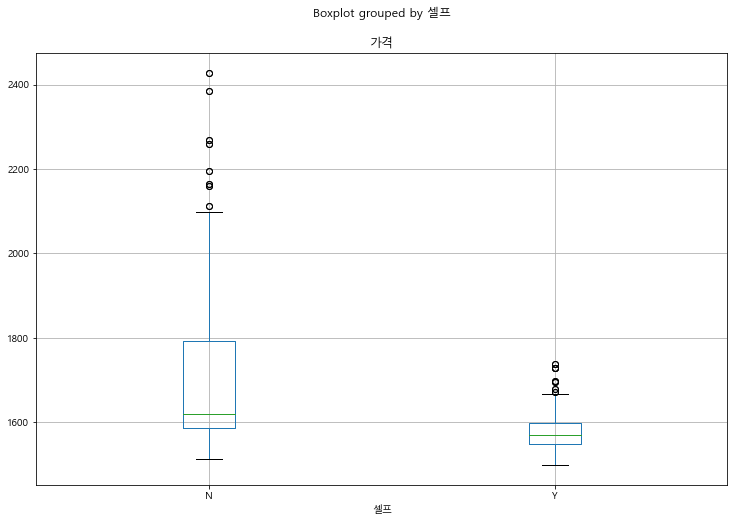

In [44]:
stations.boxplot(column='가격', by='셀프', figsize=(12,8));

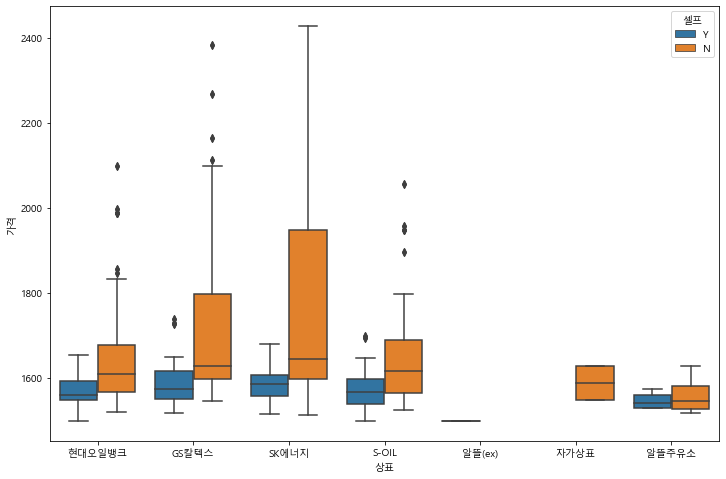

In [45]:
# 상표별로 확인
plt.figure(figsize=(12,8))
sns.boxplot(x='상표', y='가격', hue='셀프', data=stations)
plt.show()

# 서울시 구별 휘발유 가격 확인

In [21]:
import json
import folium

In [22]:
# 가격이 비싼 주유소 top5
stations.sort_values(by='가격', ascending=False).head(5)

,상호,주소,가격,셀프,상표,구
9,서남주유소,서울 중구 통일로 30,2428,N,SK에너지,중구
9,서남주유소,서울 중구 통일로 30,2428,N,SK에너지,중구
9,서남주유소,서울 중구 통일로 30,2428,N,SK에너지,중구
12,서계주유소,서울 용산구 청파로 367 (서계동),2384,N,GS칼텍스,용산구
12,서계주유소,서울 용산구 청파로 367 (서계동),2384,N,GS칼텍스,용산구


In [49]:
# 가격이 착한 주유소 top 5
stations.sort_values(by='가격').head(5)

,상호,주소,가격,셀프,상표,구
0,만남의광장주유소,서울 서초구 양재대로12길 73-71,1498,Y,알뜰(ex),서초구
0,만남의광장주유소,서울 서초구 양재대로12길 73-71,1498,Y,알뜰(ex),서초구
0,북서울고속주유소,서울 강북구 삼양로 410 (수유동),1499,Y,S-OIL,강북구
1,(주)석산에너지,서울 강북구 삼양로 316 (수유동),1499,Y,현대오일뱅크,강북구
0,북서울고속주유소,서울 강북구 삼양로 410 (수유동),1499,Y,S-OIL,강북구


In [30]:
gu_data=stations.groupby('구')[['가격']].mean()  # stations['가격'].groupby(stations['구']).mean()
gu_data

,가격
구,
강남구,1784.486486
강동구,1677.562500
강북구,1533.384615
강서구,1593.242424
관악구,1619.312500
광진구,1596.214286
구로구,1603.318182
금천구,1567.666667
노원구,1613.000000


In [36]:
geo_path = '../04. 지도_공공API/skorea_municipalities_geo_simple.json'
geo_data = json.load(open(geo_path, encoding='utf-8'))

In [37]:
map = folium.Map(
        location=[37.5502, 126.982], 
        zoom_start=11, tiles='Stamen Toner'
)
map.choropleth(
    geo_data = geo_data,
    data = gu_data.가격,  # dataframe이여야 가능(시리즈 안됨)
    columns = [gu_data.index, gu_data.가격],
    fill_color = 'PuRd',
    key_on = 'feature.id'
)
map